In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

def load_and_predict(image_path, num_fold=10):
    # 加載圖像並進行預處理
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.expand_dims(image, axis=0)
    
    all_predictions = []

    for fold in range(2, num_fold + 2):
        model_name = f"../model_small_Kfold_{fold}.h5"
        model = tf.keras.models.load_model(model_name)
        prediction = model.predict(image)
        all_predictions.append(prediction)

    # 計算平均預測值
    average_predictions = np.mean(all_predictions, axis=0)
    predicted_class = np.argmax(average_predictions, axis=1)

    return predicted_class[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: 0
Label: NP


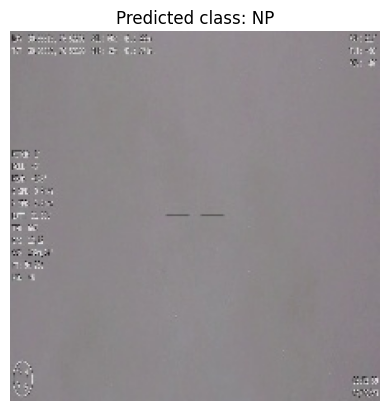

In [14]:
# 測試預測
image_path = '../水質檢測/Image_data/6_September/09_September_2023_08_43_34-1004.jpg'
predicted_class = load_and_predict(image_path, num_fold=10)

class2label = {0: "NP", 1: "SP", 2: "MP"}
print("Predicted class:", predicted_class)
print("Label:", class2label[predicted_class])

# 顯示圖像
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)
image = tf.image.resize(image, (224, 224))

# Matplotlib 顯示圖像
plt.imshow(image.numpy().astype("uint8"))
plt.title(f"Predicted class: {class2label[predicted_class]}")
plt.axis('off')
plt.show()